In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
data = pd.read_csv("D:\\Mars Rover Manipal\\Titanic\\titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [137]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [138]:
df=data.drop(['Cabin','Name','Ticket'],axis=1)
df = df.dropna(subset=['Age'])
df = df.dropna(subset=['Embarked'])

In [139]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [140]:
df = pd.get_dummies(df, columns=["Sex","Embarked"])
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,True,False,False,True,False
886,887,0,2,27.0,0,0,13.0000,False,True,False,False,True
887,888,1,1,19.0,0,0,30.0000,True,False,False,False,True
889,890,1,1,26.0,0,0,30.0000,False,True,True,False,False


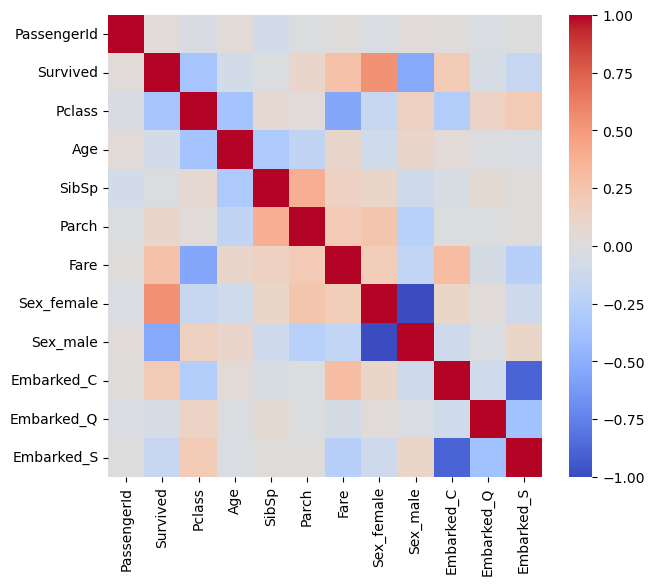

In [141]:
plt.figure(figsize=(7, 6))
sns.heatmap(df.corr(),cmap="coolwarm")
plt.show()

In [142]:
data = data.dropna(subset=['Age'])
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare']]
y = data['Survived']
X = pd.get_dummies(X, columns=["Sex"])
X=X.drop(['Sex_male'],axis=1)

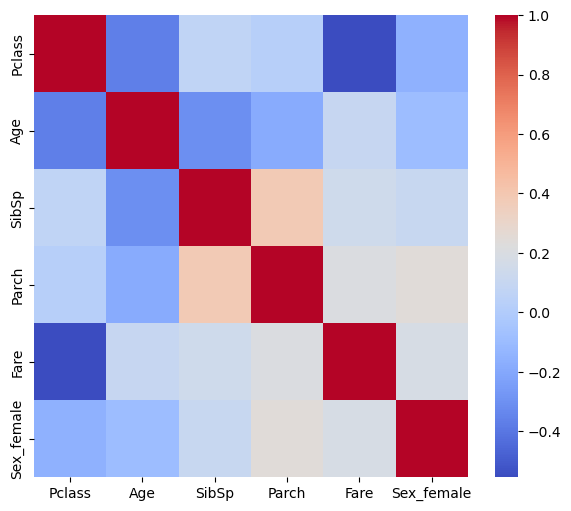

In [143]:
plt.figure(figsize=(7, 6))
sns.heatmap(X.corr(),cmap="coolwarm")
plt.show()

In [144]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [145]:
def standard(X):
    return (X - X.mean()) / X.std()

X_train = standard(X_train)
X_val = standard(X_val)
X_test = standard(X_test)

In [146]:
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_val = np.c_[np.ones((X_val.shape[0], 1)), X_val]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [147]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [148]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (1 / m) * (-np.dot(y, np.log(h)) - np.dot((1 - y), np.log(1 - h)))
    return cost

In [149]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    costs = []

    for _ in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)

    return theta, costs

In [150]:
theta = np.zeros(X_train.shape[1])
alpha = 0.5
num_iters = 300
theta, costs = gradient_descent(X_train, y_train, theta, alpha, num_iters)

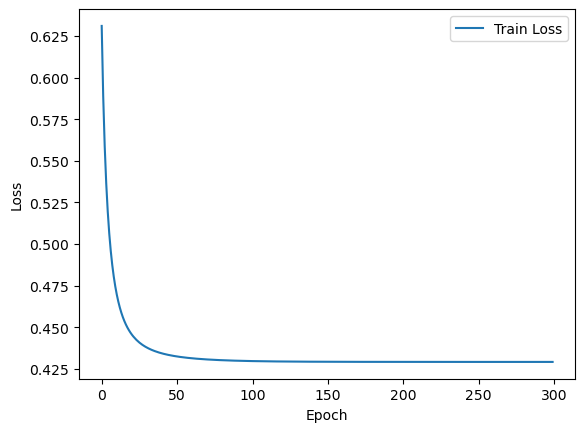

In [151]:
plt.plot(costs, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [152]:
val_predictions = (sigmoid(np.dot(X_val, theta)) >= 0.5).astype(int)
accuracy = np.sum(y_val == val_predictions) / len(y_val)

true_positives = np.sum((y_val == 1) & (val_predictions == 1))
false_positives = np.sum((y_val == 0) & (val_predictions == 1))
false_negatives = np.sum((y_val == 1) & (val_predictions == 0))

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Validation Accuracy:", accuracy)
print(f"Validation Precision:",precision)
print(f"Validation Recall:",recall)
print(f"Validation F1 Score:",f1_score)

Validation Accuracy: 0.7663551401869159
Validation Precision: 0.725
Validation Recall: 0.6744186046511628
Validation F1 Score: 0.6987951807228916


In [153]:
test_predictions = (sigmoid(np.dot(X_test, theta)) >= 0.5).astype(int)
acc = np.sum(y_test == test_predictions) / len(y_test)

true_pos = np.sum((y_test == 1) & (test_predictions == 1))
false_pos = np.sum((y_test == 0) & (test_predictions == 1))
false_neg = np.sum((y_test == 1) & (test_predictions == 0))

pre = true_pos / (true_pos + false_pos)
rec = true_pos / (true_pos + false_neg)
f1_sco = 2 * (pre * rec) / (pre + rec)

print(f"test Accuracy:",acc)
print(f"test Precision:",pre)
print(f"test Recall:",rec)
print(f"test F1 Score:",f1_sco)

test Accuracy: 0.7777777777777778
test Precision: 0.75
test Recall: 0.717391304347826
test F1 Score: 0.7333333333333332
